<a href="https://colab.research.google.com/github/NithinReddychallagonda/Data-Mining/blob/main/ADM_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
# Create a synthetic dataset
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers = np.random.uniform(5, 10, 5)
data_with_outliers = np.concatenate([data, outliers])

In [63]:
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [64]:
df.describe()

,Value
count,105.000000
mean,0.236332
std,1.794453
min,-2.619745
25%,-0.562288
50%,-0.035826
75%,0.611676
max,9.714549


In [65]:
# Step 1: Detect Outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [66]:
print(lower_bound)
print(upper_bound)

-2.3232332563637335
2.372622015963629


In [67]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] >
upper_bound)]

In [68]:
print(outliers_iqr)

        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


In [69]:
# Step 2: Detect Outliers using Z-Score method
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

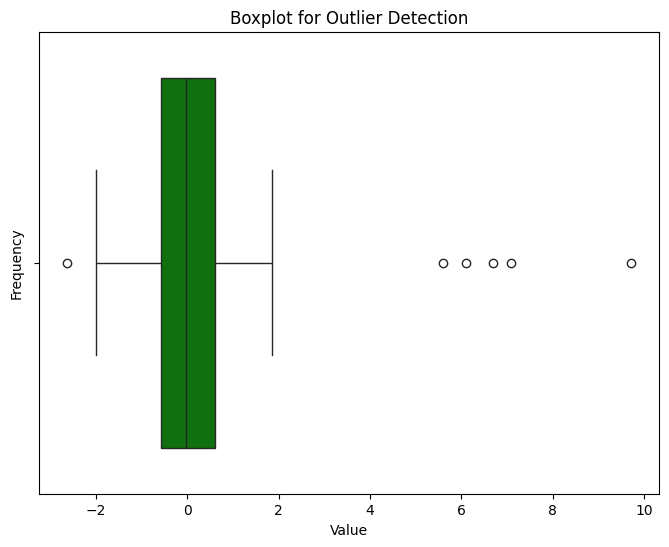

In [70]:
# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'], color='green')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [71]:
# Step 4: Handle Outliers
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [73]:
# Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]

In [74]:
# Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

In [78]:
print(df_removed)

       Value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


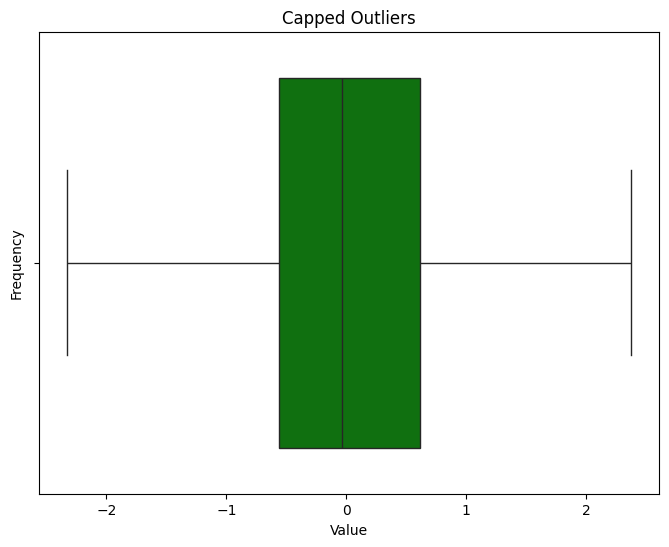

In [80]:
# Step 5: Visualize handled data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'], color='green')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Capped Outliers")
plt.show()

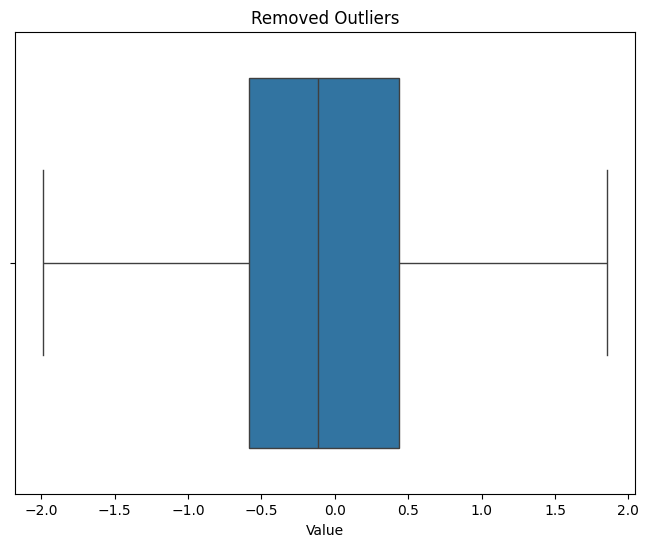

In [84]:
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

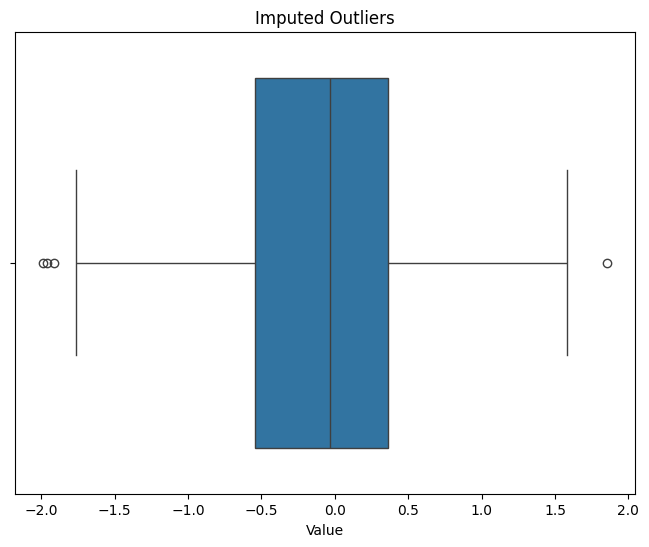

In [85]:
# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()
